In [5]:
import pod5
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 12
sys.path.insert(0, '/private/groups/brookslab/gabai/tools/NEMO/src/')
import importlib
from qc import *

In [6]:
dt_outpath = '../data/'
fig_outpath = '../figures/'

## predicted modification score distribution

## Figure 2E

In [129]:
neg_pred = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240911_dorado_220308_ang_0.tsv'
pos_pred = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240911_dorado_220308_ang_500.tsv'
# rep1
chrom_190429_pred = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240912_dorado_20190429_chrom.tsv'
# rep2
chrom_210615_pred = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240917_dorado_20210615_full.tsv'
# rep3
chrom_190819_pred = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240909_dorado_20190819_chrom.tsv'
# rep4
chrom_220331_pred = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240909_dorado_20220331_chrom.tsv'
# spheroplast
chrom_sphe_pred = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240909_dorado_sphe_using_nuclei_model.tsv'
allpred = [neg_pred, pos_pred, chrom_190429_pred, chrom_210615_pred, chrom_190819_pred, chrom_220331_pred, chrom_sphe_pred]
labels = ['negative ctrl', 'positive ctrl', 'nuclei rep1', 'nuclei rep2', 'nuclei rep3', 'nuclei rep4', 'spheroplast']
mycolor = ['tab:blue', 'tab:orange', 'tab:purple', 'darkviolet', 'tab:pink', 'hotpink', 'tab:green']

In [108]:
mod_scores = []
nreads = ''
for i in range(len(allpred)):
    mod_score = []
    print(labels[i])
    with open(allpred[i], 'r') as infile:
        c=0
        for line in tqdm(infile):
            c+=1
            readname = line.strip().split('\t')[0]
            start = line.strip().split('\t')[3]
            scores = line.strip().split('\t')[-1]
            scores = [float(i) for i in scores.split(',')]
            mod_score.extend(scores)
            if nreads:
                if c>nreads: break
    mod_scores.append(mod_score)

negative ctrl


36865it [01:28, 417.01it/s] 


positive ctrl


40196it [00:58, 692.71it/s] 


nuclei rep1


58289it [01:52, 520.37it/s] 


nuclei rep2


1308037it [05:10, 4213.16it/s]


nuclei rep3


21646it [00:17, 1224.41it/s]


nuclei rep4


61818it [03:00, 342.01it/s]


spheroplast


13344it [01:03, 211.57it/s]


In [ ]:
plt.figure(figsize=(6, 5))
for i in range(len(mod_scores)):
    mod_score = mod_scores[i]
    kde = stats.gaussian_kde(mod_score)
    x = np.arange(0, 255, 5)
    density = kde(x)
    plt.plot(x, density, label=labels[i], color = mycolor[i])
    # plt.bar(x, density, color = mycolor[i], alpha=0.7, width = 0.5)
plt.legend()
plt.xticks(np.arange(0, 255, 50))
plt.xlim(0, 256)
plt.xlabel('predicted modification\nscore per read')
plt.ylabel('density')
plt.savefig(fig_outpath+ f'Supp_Fig2_predicted_modification_score_per_read.pdf', bbox_inches='tight')

In [ ]:
labelstoplot = ['negative ctrl', 'positive ctrl', 'nuclei rep1', 'spheroplast']
plt.figure(figsize=(6, 5))
for i in range(len(mod_scores)):
    if labels[i] not in labelstoplot: continue
    mod_score = mean_mod_per_reads[i]
    kde = stats.gaussian_kde(mod_score)
    x = np.arange(0, 255, 1)
    density = kde(x)
    plt.plot(x, density, label=labels[i], color = mycolor[i])
    # plt.bar(x, density, color = mycolor[i], alpha=0.7, width = 0.5)
plt.legend()
plt.xticks(np.arange(0, 255, 50))
plt.xlim(0, 256)
plt.xlabel('predicted modification\nscore per read')
plt.ylabel('density')
plt.savefig(fig_outpath+ f'Figure2E_predicted_modification_score_per_read.pdf', bbox_inches='tight')

## nucleosome occupancy around +1 nucleosome

## FigureF

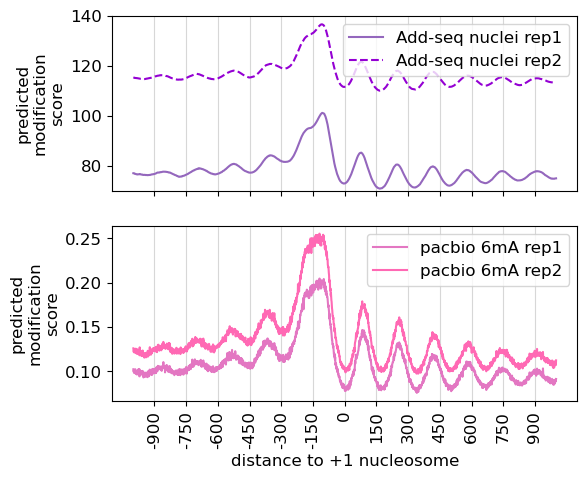

In [94]:
chrom_190429_agg = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240912_dorado_20190429_chrom_window2000_nuc_aggregate_score.tsv'
chrom_210615_agg = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240922_dorado_20210615_chrom_window2000_nuc_aggregate_score.tsv'
allagg = [chrom_190429_agg, chrom_210615_agg]
hw = int(2000/2)

space=150

labels = ['Add-seq nuclei rep1', 'Add-seq nuclei rep2']
colors = ['tab:purple', 'darkviolet']
ls = ['-', '--']

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(6,5))

for i in range(len(allagg)):
    with open(allagg[i], 'r') as infile:
        agg_scores = []
        for line in infile:
            line = line.strip().split('\t')
            agg_scores.append(float(line[1]))
        ax1.plot(np.arange(-hw, hw+1), agg_scores, label = labels[i], color=colors[i], ls = ls[i], alpha=1)

ax1.set_ylim(70, 140)
ax1.grid(alpha=0.5,axis = 'x')
ax1.legend()
# ax1.legend(loc='upper right')

pacbio_agg_rep1 = '/private/groups/brookslab/gabai/projects/Add-seq/results/241017_pacbio_6mA_rep1_aggregate_score.tsv'
pacbio_agg_rep2 = '/private/groups/brookslab/gabai/projects/Add-seq/results/241017_pacbio_6mA_rep2_aggregate_score.tsv'
ctrlagg = [pacbio_agg_rep1, pacbio_agg_rep2]
labels = ['pacbio 6mA rep1', 'pacbio 6mA rep2']
colors = ['tab:pink', 'hotpink']
ls = ['-', '-']

for i in range(len(ctrlagg)):
    with open(ctrlagg[i], 'r') as infile:
        agg_scores = []
        for line in infile:
            line = line.strip().split('\t')
            agg_scores.append(float(line[1]))
        ax2.plot(np.arange(-hw, hw+1), agg_scores, label = labels[i], color=colors[i], ls = ls[i], alpha=1)

x_ticks = np.concatenate((np.flip(np.arange(0, -hw-1, -space)[1:]), np.arange(0, hw+1, space)), axis=0)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels('', rotation='vertical')
ax2.set_xticks(x_ticks)
# Rotate the labels by passing the same labels and setting rotation
ax2.set_xticklabels(x_ticks, rotation='vertical')
ax2.grid(alpha=0.5,axis = 'x')
ax2.set_xlabel('distance to +1 nucleosome')
ax1.set_ylabel('predicted\nmodification\nscore')
ax2.set_ylabel('predicted\nmodification\nscore')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax2.legend()
plt.savefig(fig_outpath+ f'Figure2F_nuclei_chrom_nuc_window2000.pdf', bbox_inches='tight')
plt.show()
plt.close()

## FigureG

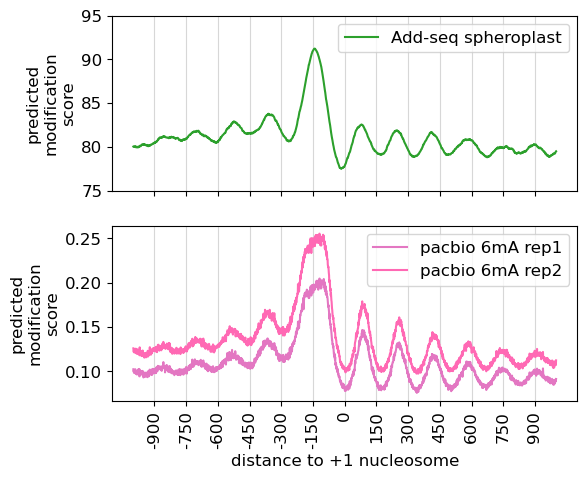

In [91]:
chrom_sphe = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240909_dorado_sphe_using_nuclei_model_window2000_nuc_aggregate_score.tsv'
labels = ['Add-seq spheroplast']
allagg= [chrom_sphe]

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(6,5))

for i in range(len(allagg)):
    with open(allagg[i], 'r') as infile:
        agg_scores = []
        for line in infile:
            line = line.strip().split('\t')
            agg_scores.append(float(line[1]))
        ax1.plot(np.arange(-hw, hw+1), agg_scores, label = labels[i], color='tab:green', alpha=1)

ax1.set_ylim(75, 95)

pacbio_agg_rep1 = '/private/groups/brookslab/gabai/projects/Add-seq/results/241017_pacbio_6mA_rep1_aggregate_score.tsv'
pacbio_agg_rep2 = '/private/groups/brookslab/gabai/projects/Add-seq/results/241017_pacbio_6mA_rep2_aggregate_score.tsv'
ctrlagg = [pacbio_agg_rep1, pacbio_agg_rep2]
labels = ['pacbio 6mA rep1', 'pacbio 6mA rep2']
colors = ['tab:pink', 'hotpink']
ls = ['-', '-']

for i in range(len(ctrlagg)):
    with open(ctrlagg[i], 'r') as infile:
        agg_scores = []
        for line in infile:
            line = line.strip().split('\t')
            agg_scores.append(float(line[1]))
        ax2.plot(np.arange(-hw, hw+1), agg_scores, label = labels[i], color=colors[i], ls = ls[i], alpha=1)

x_ticks = np.concatenate((np.flip(np.arange(0, -hw-1, -space)[1:]), np.arange(0, hw+1, space)), axis=0)

ax1.grid(alpha=0.5,axis = 'x')
ax1.legend(loc='upper right')
ax1.set_xticks(x_ticks)
ax1.set_xticklabels('', rotation='vertical')
ax2.set_xticks(x_ticks)
# Rotate the labels by passing the same labels and setting rotation
ax2.set_xticklabels(x_ticks, rotation='vertical')
ax2.grid(alpha=0.5,axis = 'x')
ax2.set_xlabel('distance to +1 nucleosome')
ax1.set_ylabel('predicted\nmodification\nscore')
ax2.set_ylabel('predicted\nmodification\nscore')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax2.legend()
plt.savefig(fig_outpath+ f'Figure2G_spheroplast_chrom_nuc_window2000.pdf', bbox_inches='tight')
plt.show()
plt.close()

### nucleosome occupanncy around transcription termination sites

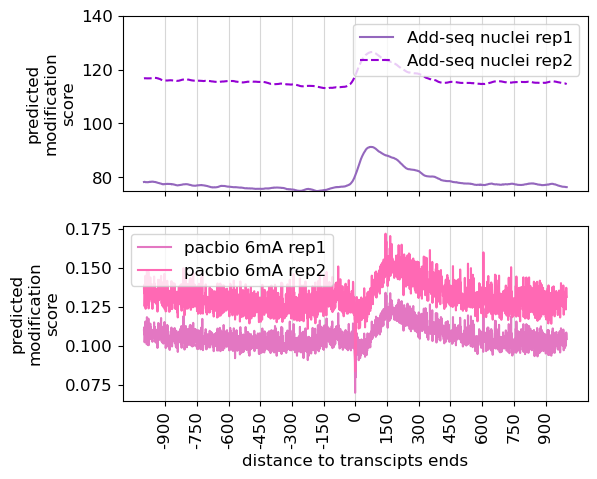

In [92]:
chrom_190429_agg = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240912_dorado_20190429_chrom_window2000_tts_aggregate_score.tsv'
chrom_210615_agg = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240922_dorado_20210615_chrom_window2000_tts_aggregate_score.tsv'
allagg = [chrom_190429_agg, chrom_210615_agg]
hw = int(2000/2)

space=150

labels = ['Add-seq nuclei rep1', 'Add-seq nuclei rep2']
colors = ['tab:purple', 'darkviolet']
ls = ['-', '--']

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(6,5))

for i in range(len(allagg)):
    with open(allagg[i], 'r') as infile:
        agg_scores = []
        for line in infile:
            line = line.strip().split('\t')
            agg_scores.append(float(line[1]))
        ax1.plot(np.arange(-hw, hw+1), agg_scores, label = labels[i], color=colors[i], ls = ls[i], alpha=1)

ax1.set_ylim(75, 140)
ax1.grid(alpha=0.5,axis = 'x')
ax1.legend(loc='upper right')

pacbio_agg_rep1 = '/private/groups/brookslab/gabai/projects/Add-seq/results/241017_pacbio_6mA_rep1_tts_aggregate_score.tsv'
pacbio_agg_rep2 = '/private/groups/brookslab/gabai/projects/Add-seq/results/241017_pacbio_6mA_rep2_tts_aggregate_score.tsv'
ctrlagg = [pacbio_agg_rep1, pacbio_agg_rep2]
labels = ['pacbio 6mA rep1', 'pacbio 6mA rep2']
colors = ['tab:pink', 'hotpink']
ls = ['-', '-']

for i in range(len(ctrlagg)):
    with open(ctrlagg[i], 'r') as infile:
        agg_scores = []
        for line in infile:
            line = line.strip().split('\t')
            agg_scores.append(float(line[1]))
        ax2.plot(np.arange(-hw, hw+1), agg_scores, label = labels[i], color=colors[i], ls = ls[i], alpha=1)

x_ticks = np.concatenate((np.flip(np.arange(0, -hw-1, -space)[1:]), np.arange(0, hw+1, space)), axis=0)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels('', rotation='vertical')
ax2.set_xticks(x_ticks)
# Rotate the labels by passing the same labels and setting rotation
ax2.set_xticklabels(x_ticks, rotation='vertical')
ax2.grid(alpha=0.5,axis = 'x')
ax2.set_xlabel('distance to transcipts ends')
ax1.set_ylabel('predicted\nmodification\nscore')
ax2.set_ylabel('predicted\nmodification\nscore')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax2.legend()
plt.savefig(fig_outpath+ f'Supp_Fig2_nuclei_chrom_tts_window2000.pdf', bbox_inches='tight')
plt.show()
plt.close()

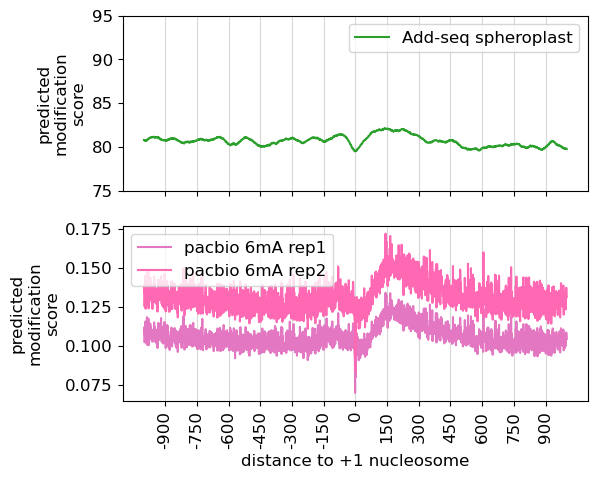

In [93]:
chrom_sphe = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240909_dorado_sphe_using_nuclei_model_window2000_tts_aggregate_score.tsv'
labels = ['Add-seq spheroplast']
allagg= [chrom_sphe]

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(6,5))

for i in range(len(allagg)):
    with open(allagg[i], 'r') as infile:
        agg_scores = []
        for line in infile:
            line = line.strip().split('\t')
            agg_scores.append(float(line[1]))
        ax1.plot(np.arange(-hw, hw+1), agg_scores, label = labels[i], color='tab:green', alpha=1)

pacbio_agg_rep1 = '/private/groups/brookslab/gabai/projects/Add-seq/results/241017_pacbio_6mA_rep1_tts_aggregate_score.tsv'
pacbio_agg_rep2 = '/private/groups/brookslab/gabai/projects/Add-seq/results/241017_pacbio_6mA_rep2_tts_aggregate_score.tsv'
ctrlagg = [pacbio_agg_rep1, pacbio_agg_rep2]
labels = ['pacbio 6mA rep1', 'pacbio 6mA rep2']
colors = ['tab:pink', 'hotpink']
ls = ['-', '-']

for i in range(len(ctrlagg)):
    with open(ctrlagg[i], 'r') as infile:
        agg_scores = []
        for line in infile:
            line = line.strip().split('\t')
            agg_scores.append(float(line[1]))
        ax2.plot(np.arange(-hw, hw+1), agg_scores, label = labels[i], color=colors[i], ls = ls[i], alpha=1)

x_ticks = np.concatenate((np.flip(np.arange(0, -hw-1, -space)[1:]), np.arange(0, hw+1, space)), axis=0)
ax1.set_ylim(75, 95)
ax1.grid(alpha=0.5,axis = 'x')
ax1.legend(loc='upper right')
ax1.set_xticks(x_ticks)
ax1.set_xticklabels('', rotation='vertical')
ax2.set_xticks(x_ticks)
# Rotate the labels by passing the same labels and setting rotation
ax2.set_xticklabels(x_ticks, rotation='vertical')
ax2.grid(alpha=0.5,axis = 'x')
ax2.set_xlabel('distance to +1 nucleosome')
ax1.set_ylabel('predicted\nmodification\nscore')
ax2.set_ylabel('predicted\nmodification\nscore')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax2.legend()
plt.savefig(fig_outpath+ f'Supp_Fig2_spheroplast_chrom_tts_window2000.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
chrom_sphe = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240909_dorado_sphe_using_nuclei_model_window2000_nuc_aggregate_score.tsv'
labels = ['Add-seq spheroplast']
allagg= [chrom_sphe]

fig, ax1 = plt.subplots(1, 1, figsize=(6,5))

for i in range(len(allagg)):
    with open(allagg[i], 'r') as infile:
        agg_scores = []
        for line in infile:
            line = line.strip().split('\t')
            agg_scores.append(float(line[1]))
        ax1.plot(np.arange(-hw, hw+1), agg_scores, label = labels[i], color='tab:blue', alpha=1)

ax1.set_ylim(75, 95)
plt.savefig('../figures/Figure3A.pdf')